In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [29]:
import pandas as pd
import io

# Read the file and fix the formatting
with open('/Users/ethannordman/Desktop/winequality-white.csv', 'r') as f:
    content = f.read()

# Remove all the double quotes from the header
content = content.replace('""', '')
content = content.replace('"', '')

# Read into pandas
df = pd.read_csv(io.StringIO(content), sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Initial Visual analysis

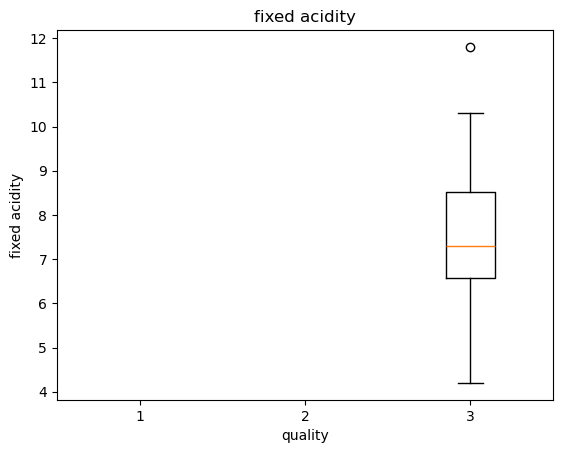

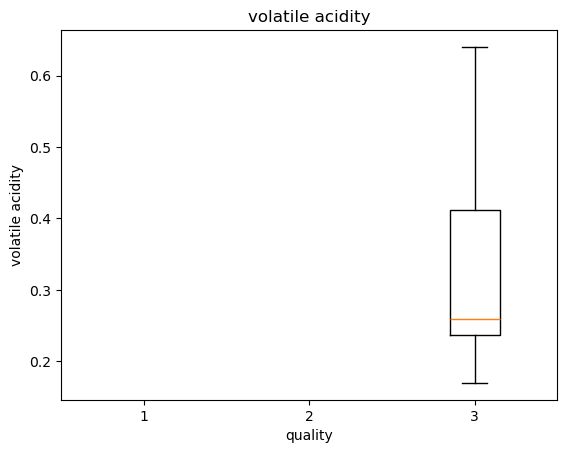

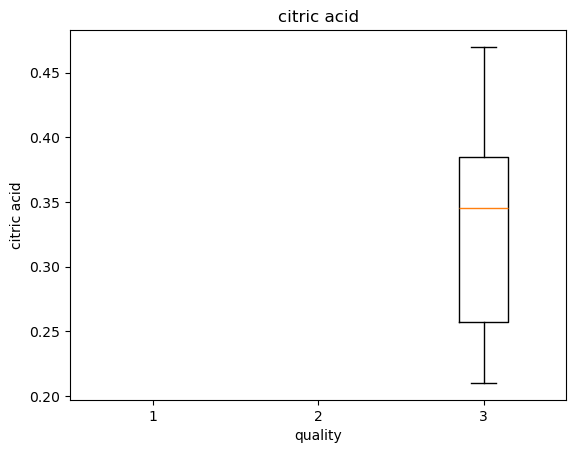

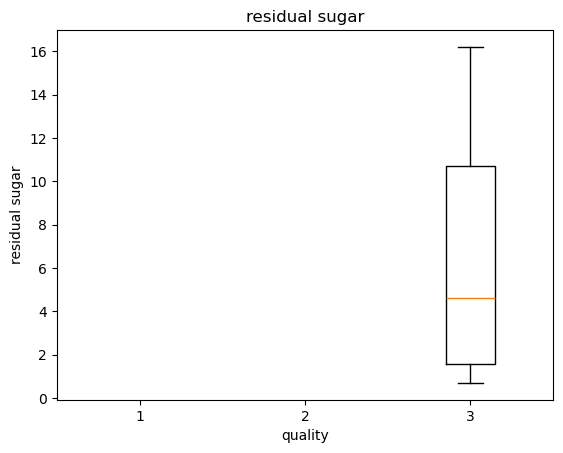

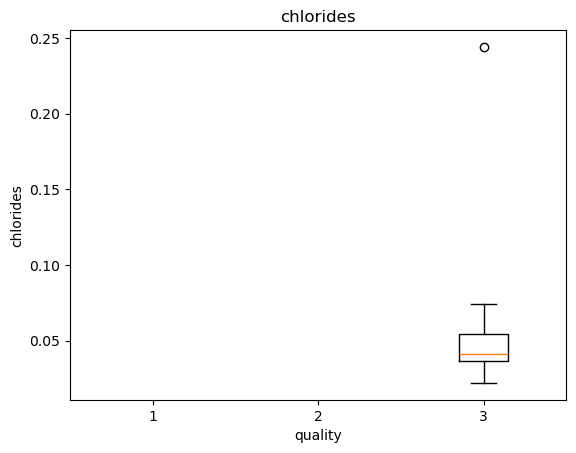

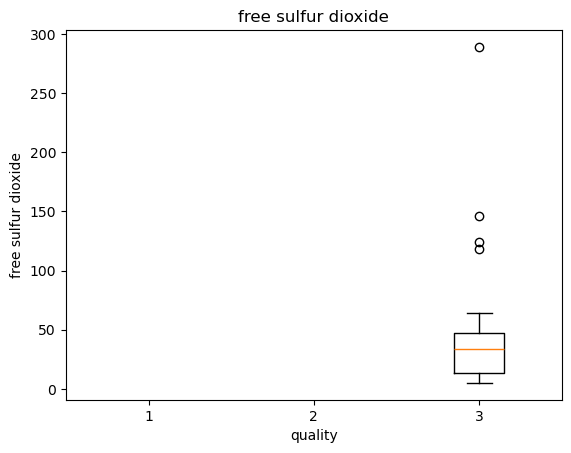

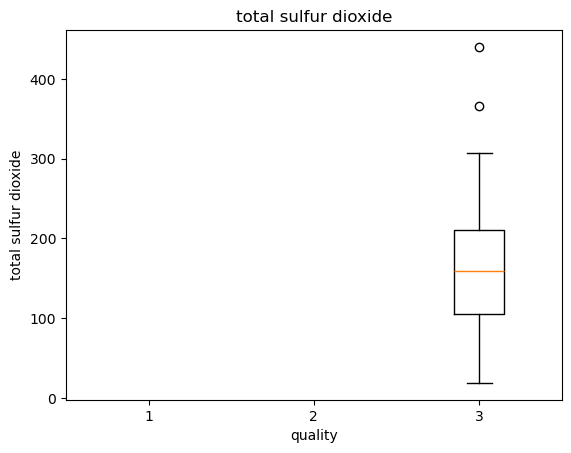

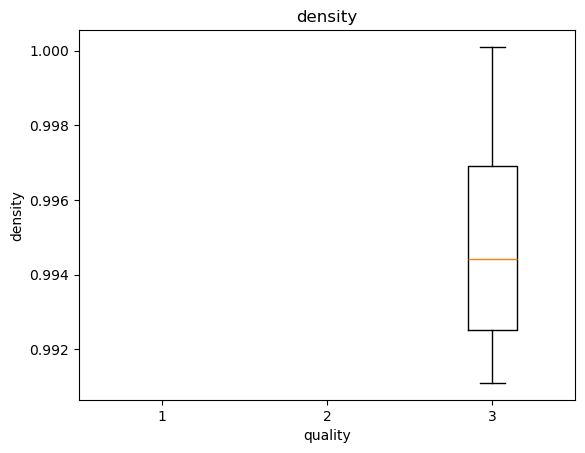

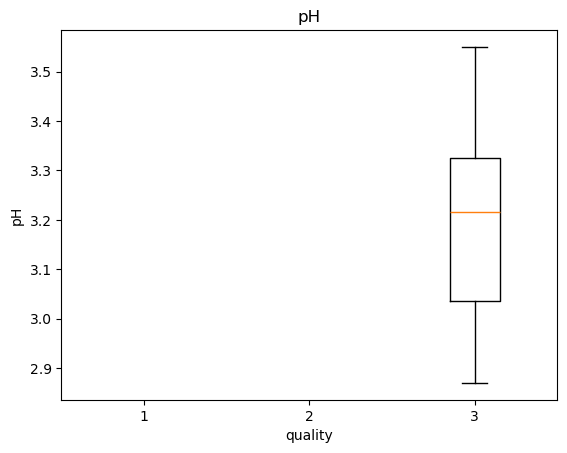

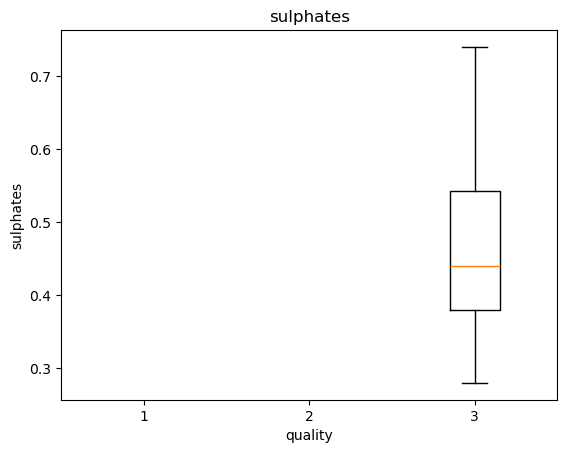

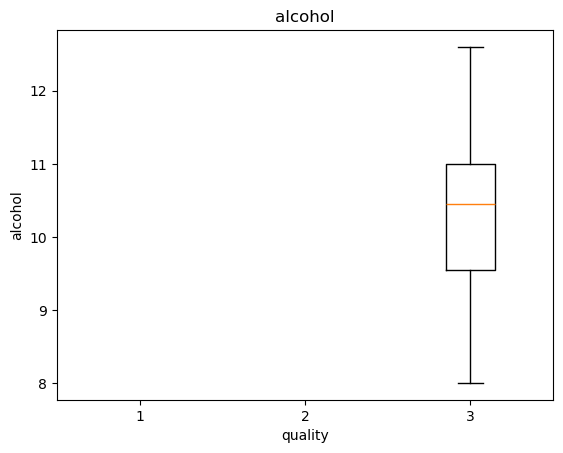

In [30]:
for label in df.columns[:-1]:
    plt.figure()
    plt.boxplot([df[df['quality']==i][label] for i in range(1, 4)])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
   
    plt.show()

# Gathering and training and testing data 

In [31]:
bins = [0, 5.5, 7.5, 10] # this is saying 3-5 is low, 6-7 is mid, and 8-9 is high
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [32]:
X = df[df.columns[:-1]] # input data
y = df['quality'] # output data
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


# K Nearest Neighbors Classifier

Pick a value for K (e.g., K=3)
For a new data point, find the K closest existing data points
Look at what category those K neighbors belong to
Assign the most common category among those neighbors

Example:
Imagine you want to predict if a wine is "good" or "bad" quality. With K=3:

Find the 3 most similar wines (based on features like acidity, alcohol content, etc.)
If 2 out of 3 are "good," predict "good"
If 2 out of 3 are "bad," predict "bad"

The larger the radius the less accurate your prediction may be

In [35]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(X_train, y_train)
pred_n3 = n3.predict(X_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(estimator=n3, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.7292016806722689


In [37]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(X_train, y_train)
pred_n5 = n5.predict(X_test)
print(classification_report(y_test, pred_n5))
cross_val = cross_val_score(estimator=n5, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       321
           1       0.76      0.82      0.79       624
           2       0.33      0.11      0.17        35

    accuracy                           0.72       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.71      0.72      0.71       980

0.7225618508272874


# Random Forest Classifier

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       321
           1       0.84      0.88      0.86       624
           2       0.94      0.43      0.59        35

    accuracy                           0.82       980
   macro avg       0.85      0.68      0.73       980
weighted avg       0.82      0.82      0.81       980

0.8042356072863928


# Decision Tree Classifier

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       321
           1       0.80      0.79      0.79       624
           2       0.40      0.54      0.46        35

    accuracy                           0.74       980
   macro avg       0.62      0.66      0.64       980
weighted avg       0.74      0.74      0.74       980

0.7391526175687667


# Stochastic Gradient Decent

Minimize a loss fucntion:

Minimize the penalty using this classifier


In [40]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=sgd, X=X_train, y=y_train, cv=10)
print(cross_val.mean())


              precision    recall  f1-score   support

           0       0.66      0.66      0.66       321
           1       0.80      0.79      0.79       624
           2       0.40      0.54      0.46        35

    accuracy                           0.74       980
   macro avg       0.62      0.66      0.64       980
weighted avg       0.74      0.74      0.74       980

0.7013792473511143
